In [1]:
# Import the required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Step 1: Read in the `tsx-energy-2018.csv` file and create the DataFrame. Make sure to set the `Ticker` column as the DataFrame’s index. Then review the DataFrame.

In [2]:
# Read the CSV file into a Pandas DataFrame
# Set the index using the Ticker column
df_stocks = pd.read_csv("https://static.bc-edx.com/mbc/ai/m2/datasets/tsx-energy-2018.csv", index_col="Ticker")

# Review the DataFrame
df_stocks.head()

,CompanyName,MeanOpen,MeanHigh,MeanLow,MeanClose,MeanVolume,AnnualReturn,AnnualVariance,EnergyType
Ticker,,,,,,,,,
ARX,ARC Resources Ltd.,13.14,13.34,12.91,13.10,1479913.38,-0.7275,0.3590,Oil
CCO,Cameco Corporation,13.70,13.92,13.50,13.70,1203788.22,0.2014,0.3693,Other Energy
CNQ,Canadian Natural Resources Limited,41.97,42.46,41.46,41.91,3218248.68,-0.3461,0.2947,Oil
CVE,Cenovus Energy Inc.,11.96,12.18,11.75,11.95,4566143.56,-0.3219,0.4500,Oil
CPG,Crescent Point Energy Corp.,8.53,8.67,8.36,8.50,3919414.03,-1.0103,0.4597,Other Energy


### Step 2: Review the four code cells that are included in this step in the notebook. These cells contain the code that scales the `df_stocks` DataFrame and creates a new DataFrame that contains the scaled data. 

In [3]:
# Scale price data, return, and variance values
stocks_standardized = StandardScaler().fit_transform(df_stocks[["MeanOpen", "MeanHigh", "MeanLow", "MeanClose", "MeanVolume", "AnnualReturn", "AnnualVariance"]])

In [4]:
# Create a DataFrame with the scaled data
df_stocks_scaled = pd.DataFrame(stocks_standardized, columns=["MeanOpen", "MeanHigh", "MeanLow", "MeanClose", "MeanVolume", "AnnualReturn", "AnnualVariance"])

# Copy the tickers names from the original data
df_stocks_scaled["Ticker"] = df_stocks.index

# Set the Ticker column as index
df_stocks_scaled = df_stocks_scaled.set_index("Ticker")

# Display sample data
df_stocks_scaled.head(20)

,MeanOpen,MeanHigh,MeanLow,MeanClose,MeanVolume,AnnualReturn,AnnualVariance
Ticker,,,,,,,
ARX,-0.916832,-0.917217,-0.918045,-0.918135,-0.152786,-1.332445,0.460854
CCO,-0.880152,-0.879472,-0.879062,-0.878786,-0.379117,1.695742,0.559411
CNQ,0.971524,0.977848,0.968315,0.971255,1.272074,-0.089092,-0.154415
CVE,-0.994122,-0.992707,-0.994689,-0.993553,2.376902,-0.010201,1.331607
CPG,-1.218785,-1.221130,-1.218673,-1.219807,1.846798,-2.254365,1.424424
ENB,1.067154,1.064401,1.063459,1.063725,1.720226,0.389472,-0.736194
ERF,-0.817272,-0.815696,-0.817615,-0.817140,-0.453229,0.206587,0.533576
GEI,-0.563789,-0.566448,-0.559934,-0.561374,-1.073401,0.950187,-0.552474
HSE,-0.540209,-0.539766,-0.539452,-0.539732,-0.281932,0.094118,0.006339


In [5]:
# Encode (convert to dummy variables) the `EnergyType` column, which categorizes oil versus non-oil firms
oil_dummies = pd.get_dummies(df_stocks["EnergyType"])
oil_dummies.head()

,Oil,Other Energy
Ticker,,
ARX,1,0
CCO,0,1
CNQ,1,0
CVE,1,0
CPG,0,1


In [6]:
# Concatenate the `EnergyType` encoded dummies with the scaled data DataFrame
df_stocks_scaled = pd.concat([df_stocks_scaled, oil_dummies], axis=1)

# Display the sample data
df_stocks_scaled.head()

,MeanOpen,MeanHigh,MeanLow,MeanClose,MeanVolume,AnnualReturn,AnnualVariance,Oil,Other Energy
Ticker,,,,,,,,,
ARX,-0.916832,-0.917217,-0.918045,-0.918135,-0.152786,-1.332445,0.460854,1,0
CCO,-0.880152,-0.879472,-0.879062,-0.878786,-0.379117,1.695742,0.559411,0,1
CNQ,0.971524,0.977848,0.968315,0.971255,1.272074,-0.089092,-0.154415,1,0
CVE,-0.994122,-0.992707,-0.994689,-0.993553,2.376902,-0.010201,1.331607,1,0
CPG,-1.218785,-1.221130,-1.218673,-1.219807,1.846798,-2.254365,1.424424,0,1


### Step 3: Using the `df_stocks_scaled` DataFrame, cluster the data by using the K-means algorithm and a lowercase-k value of  3. Add the resulting list of company segment values as a new column in the `df_stocks_scaled` DataFrame. 

> **Rewind** You can use a lowercase-k value of 3 to start, or you can use the elbow method to find the optimal value for lowercase-k.

In [7]:
# Initialize the K-Means model with n_clusters=3
model = KMeans(n_clusters=3, n_init='auto')

In [8]:
# Fit the model for the df_stocks_scaled DataFrame
model.fit(df_stocks_scaled)

KMeans(n_clusters=3, n_init='auto')

In [9]:
# Predict the model segments (clusters)
stock_clusters = model.predict(df_stocks_scaled)

# View the stock segments
print(stock_clusters)

[2 2 1 0 0 1 2 2 2 1 2 1 2 2 2 1 1 2 2 1 1 1 1 0]


In [10]:
# Create a new column in the DataFrame with the predicted clusters
df_stocks_scaled['StockCluster'] = stock_clusters

# Review the DataFrame
df_stocks_scaled.head()

,MeanOpen,MeanHigh,MeanLow,MeanClose,MeanVolume,AnnualReturn,AnnualVariance,Oil,Other Energy,StockCluster
Ticker,,,,,,,,,,
ARX,-0.916832,-0.917217,-0.918045,-0.918135,-0.152786,-1.332445,0.460854,1,0,2
CCO,-0.880152,-0.879472,-0.879062,-0.878786,-0.379117,1.695742,0.559411,0,1,2
CNQ,0.971524,0.977848,0.968315,0.971255,1.272074,-0.089092,-0.154415,1,0,1
CVE,-0.994122,-0.992707,-0.994689,-0.993553,2.376902,-0.010201,1.331607,1,0,0
CPG,-1.218785,-1.221130,-1.218673,-1.219807,1.846798,-2.254365,1.424424,0,1,0


### Step 4: Using Pandas plot, create a scatter plot to visualize the clusters setting `x="AnnualVariance"`,  `y="Annual Return"`, and `by="StockCluster"`. Be sure to style and format your plot.

<Axes: xlabel='AnnualVariance', ylabel='AnnualReturn'>

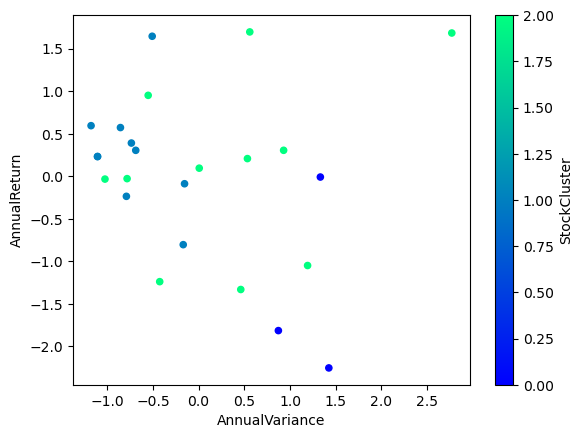

In [11]:
# Create a scatter plot with x="AnnualVariance:,  y="AnnualReturn"
df_stocks_scaled.plot.scatter(
    x="AnnualVariance",
    y="AnnualReturn",
    c="StockCluster",
    colormap='winter')


### Step 5: To get another perspective on the clusters, reduce the number of features to two principal components by using PCA. Make sure to do the following: 

---
- Use the `df_stocks_scaled` DataFrame to complete this analysis. 
- Review the PCA data. 
- Calculate the explained variance ratio that results from the PCA data. 


In [19]:
# Create the PCA model instance where n_components=2
pca = PCA(n_components=2)

In [20]:
# Fit the df_stocks_scaled data to the PCA
stocks_pca_data = pca.fit_transform(df_stocks_scaled)

# Review the first five rose of the PCA data
# using bracket notation ([0:5])
stocks_pca_data[:5]

array([[-2.03800687,  0.31799761],
       [-1.69967487, -1.58779104],
       [ 1.8983285 ,  1.36259733],
       [-2.16510038,  2.45248587],
       [-2.93609876,  2.84167047]])

In [21]:
# Calculate the explained variance
pca.explained_variance_ratio_

array([0.58907463, 0.19113038])

### Step 6: Using the PCA data calculated in the previous step, create a new DataFrame called `df_stocks_pca`. Make sure to do the following: 

* Add an additional column to the DataFrame that contains the tickers from the original `df_stocks` DataFrame. 

* Set the new Tickers column as the index. 

* Review the DataFrame.


In [23]:
# Creating a DataFrame with the PCA data
df_stocks_pca = pd.DataFrame(stocks_pca_data, columns=["PCA1", "PCA2"])

# Copy the tickers names from the original data
df_stocks_pca = pd.concat([pd.DataFrame(df_stocks_scaled.index),df_stocks_pca], axis=1)

# Set the Ticker column as index
df_stocks_pca = df_stocks_pca.set_index('Ticker')

# Review the DataFrame
df_stocks_pca

,PCA1,PCA2
Ticker,,
ARX,-2.038007,0.317998
CCO,-1.699675,-1.587791
CNQ,1.898329,1.362597
CVE,-2.165100,2.452486
CPG,-2.936099,2.841670
ENB,2.300575,1.016111
ERF,-1.704307,-0.598850
GEI,-0.805905,-1.888914
HSE,-1.058022,-0.799887


### Step 7: Rerun the K-means algorithm with the new principal-components data, and then create a scatter plot by using the two principal components for the x and y axes, and by using `StockCluster`. Be sure to style and format your plot.

In [24]:
# Initialize the K-Means model with n_clusters=3
model = KMeans(n_clusters=3, n_init='auto')

# Fit the model for the df_stocks_pca DataFrame
model.fit(df_stocks_pca)

# Predict the model segments (clusters)
stock_clusters = model.predict(df_stocks_pca)

# View the stock segments
print(stock_clusters)

[1 2 0 1 1 0 2 2 2 0 2 0 1 2 2 0 0 2 1 0 0 0 0 1]


In [26]:
# Create a copy of the df_stocks_pca DataFrame and name it as df_stocks_pca_predictions
df_stocks_pca_predictions = df_stocks_pca.copy()

# Create a new column in the DataFrame with the predicted clusters
df_stocks_pca_predictions['StockCluster'] = stock_clusters

# Review the DataFrame
df_stocks_pca_predictions

,PCA1,PCA2,StockCluster
Ticker,,,
ARX,-2.038007,0.317998,1
CCO,-1.699675,-1.587791,2
CNQ,1.898329,1.362597,0
CVE,-2.165100,2.452486,1
CPG,-2.936099,2.841670,1
ENB,2.300575,1.016111,0
ERF,-1.704307,-0.598850,2
GEI,-0.805905,-1.888914,2
HSE,-1.058022,-0.799887,2


<Axes: xlabel='PCA1', ylabel='PCA2'>

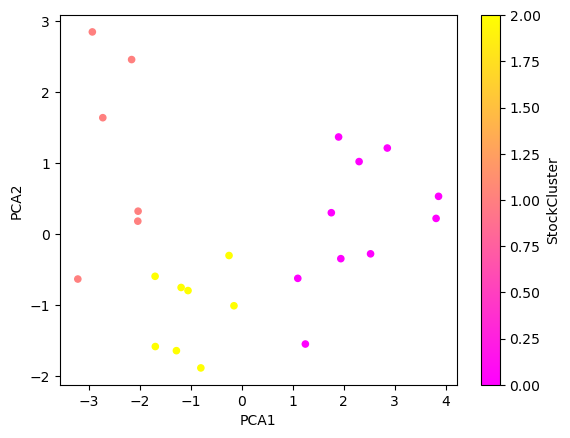

In [27]:
# Create the scatter plot with x="PC1" and y="PC2"
df_stocks_pca_predictions.plot.scatter(
    x="PCA1",
    y="PCA2",
    c="StockCluster",
    colormap="spring"
)